In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
for i in range(1,6):
  cat = ['random', 'exploit only', 'explore only', 'bo']
  data = pd.read_csv(f'../test/results/shape{i}.csv')
  data['strategy'] = np.where(data['alpha'] < 0, cat[0], cat[1])
  data['strategy'] = np.where((data['alpha'] > 10000) & (data['alpha'] < 100000), cat[2], data['strategy'])
  data['strategy'] = np.where((data['alpha'] > 100) & (data['alpha'] < 1000), cat[3], data['strategy'])

  data['strategy'] = pd.Categorical(data['strategy'], categories=cat, ordered=True)
  data.to_csv(f'../test/results/shape{i}.csv')

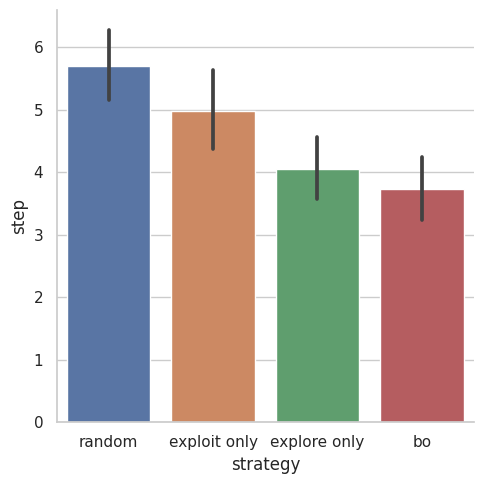

In [12]:
sns.set_theme(style="whitegrid")
splot = sns.catplot(x='strategy', y='step', data=data, kind='bar')
splot.set_titles('Steps to finish exploration')

In [13]:
datas = []
for i in range(1,6):
  data = pd.read_csv(f'../test/results/shape{i}.csv')
  data['object'] = f'shape{i}'
  datas.append(data)
data = pd.concat(datas)
data.to_csv(f'../test/results/all.csv')

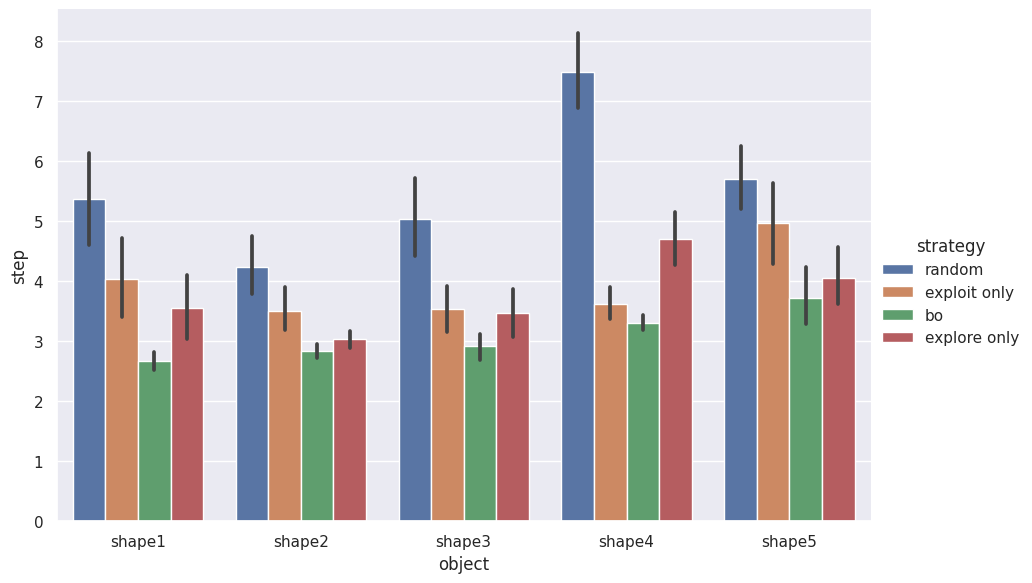

In [16]:
sns.set_theme(style="darkgrid")
splot = sns.catplot(x='object', y='step', hue='strategy', data=data, kind='bar', height=6, aspect=1.5)
splot.set_titles('Steps to finish exploration')